# Gokul D

## Data Science Intern - LGMVIP

### Task - 3 : Prediction Using Decision Tree 

#### INTERMEDIATE LEVEL

##### Dataset Used : Iris Flower Dataset (https://www.kaggle.com/arshid/iris-flower-dataset/version/1)

In [51]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report


### Loading the dataset

In [15]:
data = pd.read_csv(r'C:\Users\Dell\Downloads\IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Dataset Exploration

In [17]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
target = data['species']
data_pp = data.copy()
data_pp = data_pp.drop('species', axis=1)
data.shape

(150, 5)

In [34]:
X = data.iloc[:, [0,1,2,3]].values
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
y = data['species'].values
data.shape

(150, 5)

# To Test and Train Dataset

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Train split:",X_train.shape)
print("Test split:",X_test.shape)

Train split: (120, 4)
Test split: (30, 4)


### Defining/Initializing Decision Tree

In [36]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print(" A Decision Tree has been created successfully!")

 A Decision Tree has been created successfully!


### Classification Report

In [37]:
y_pred = dtree.predict(X_test)

print("Classification report:\n\n",classification_report(y_test,y_pred))

Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Accuracy Calculation

In [38]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred)*100,"%")

Accuracy: 100.0 %


### Confusion Matrix

In [39]:
confmatrix = confusion_matrix(y_test,y_pred)
print(confmatrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Visualizing Decision Tree for Iris Flower Dataset

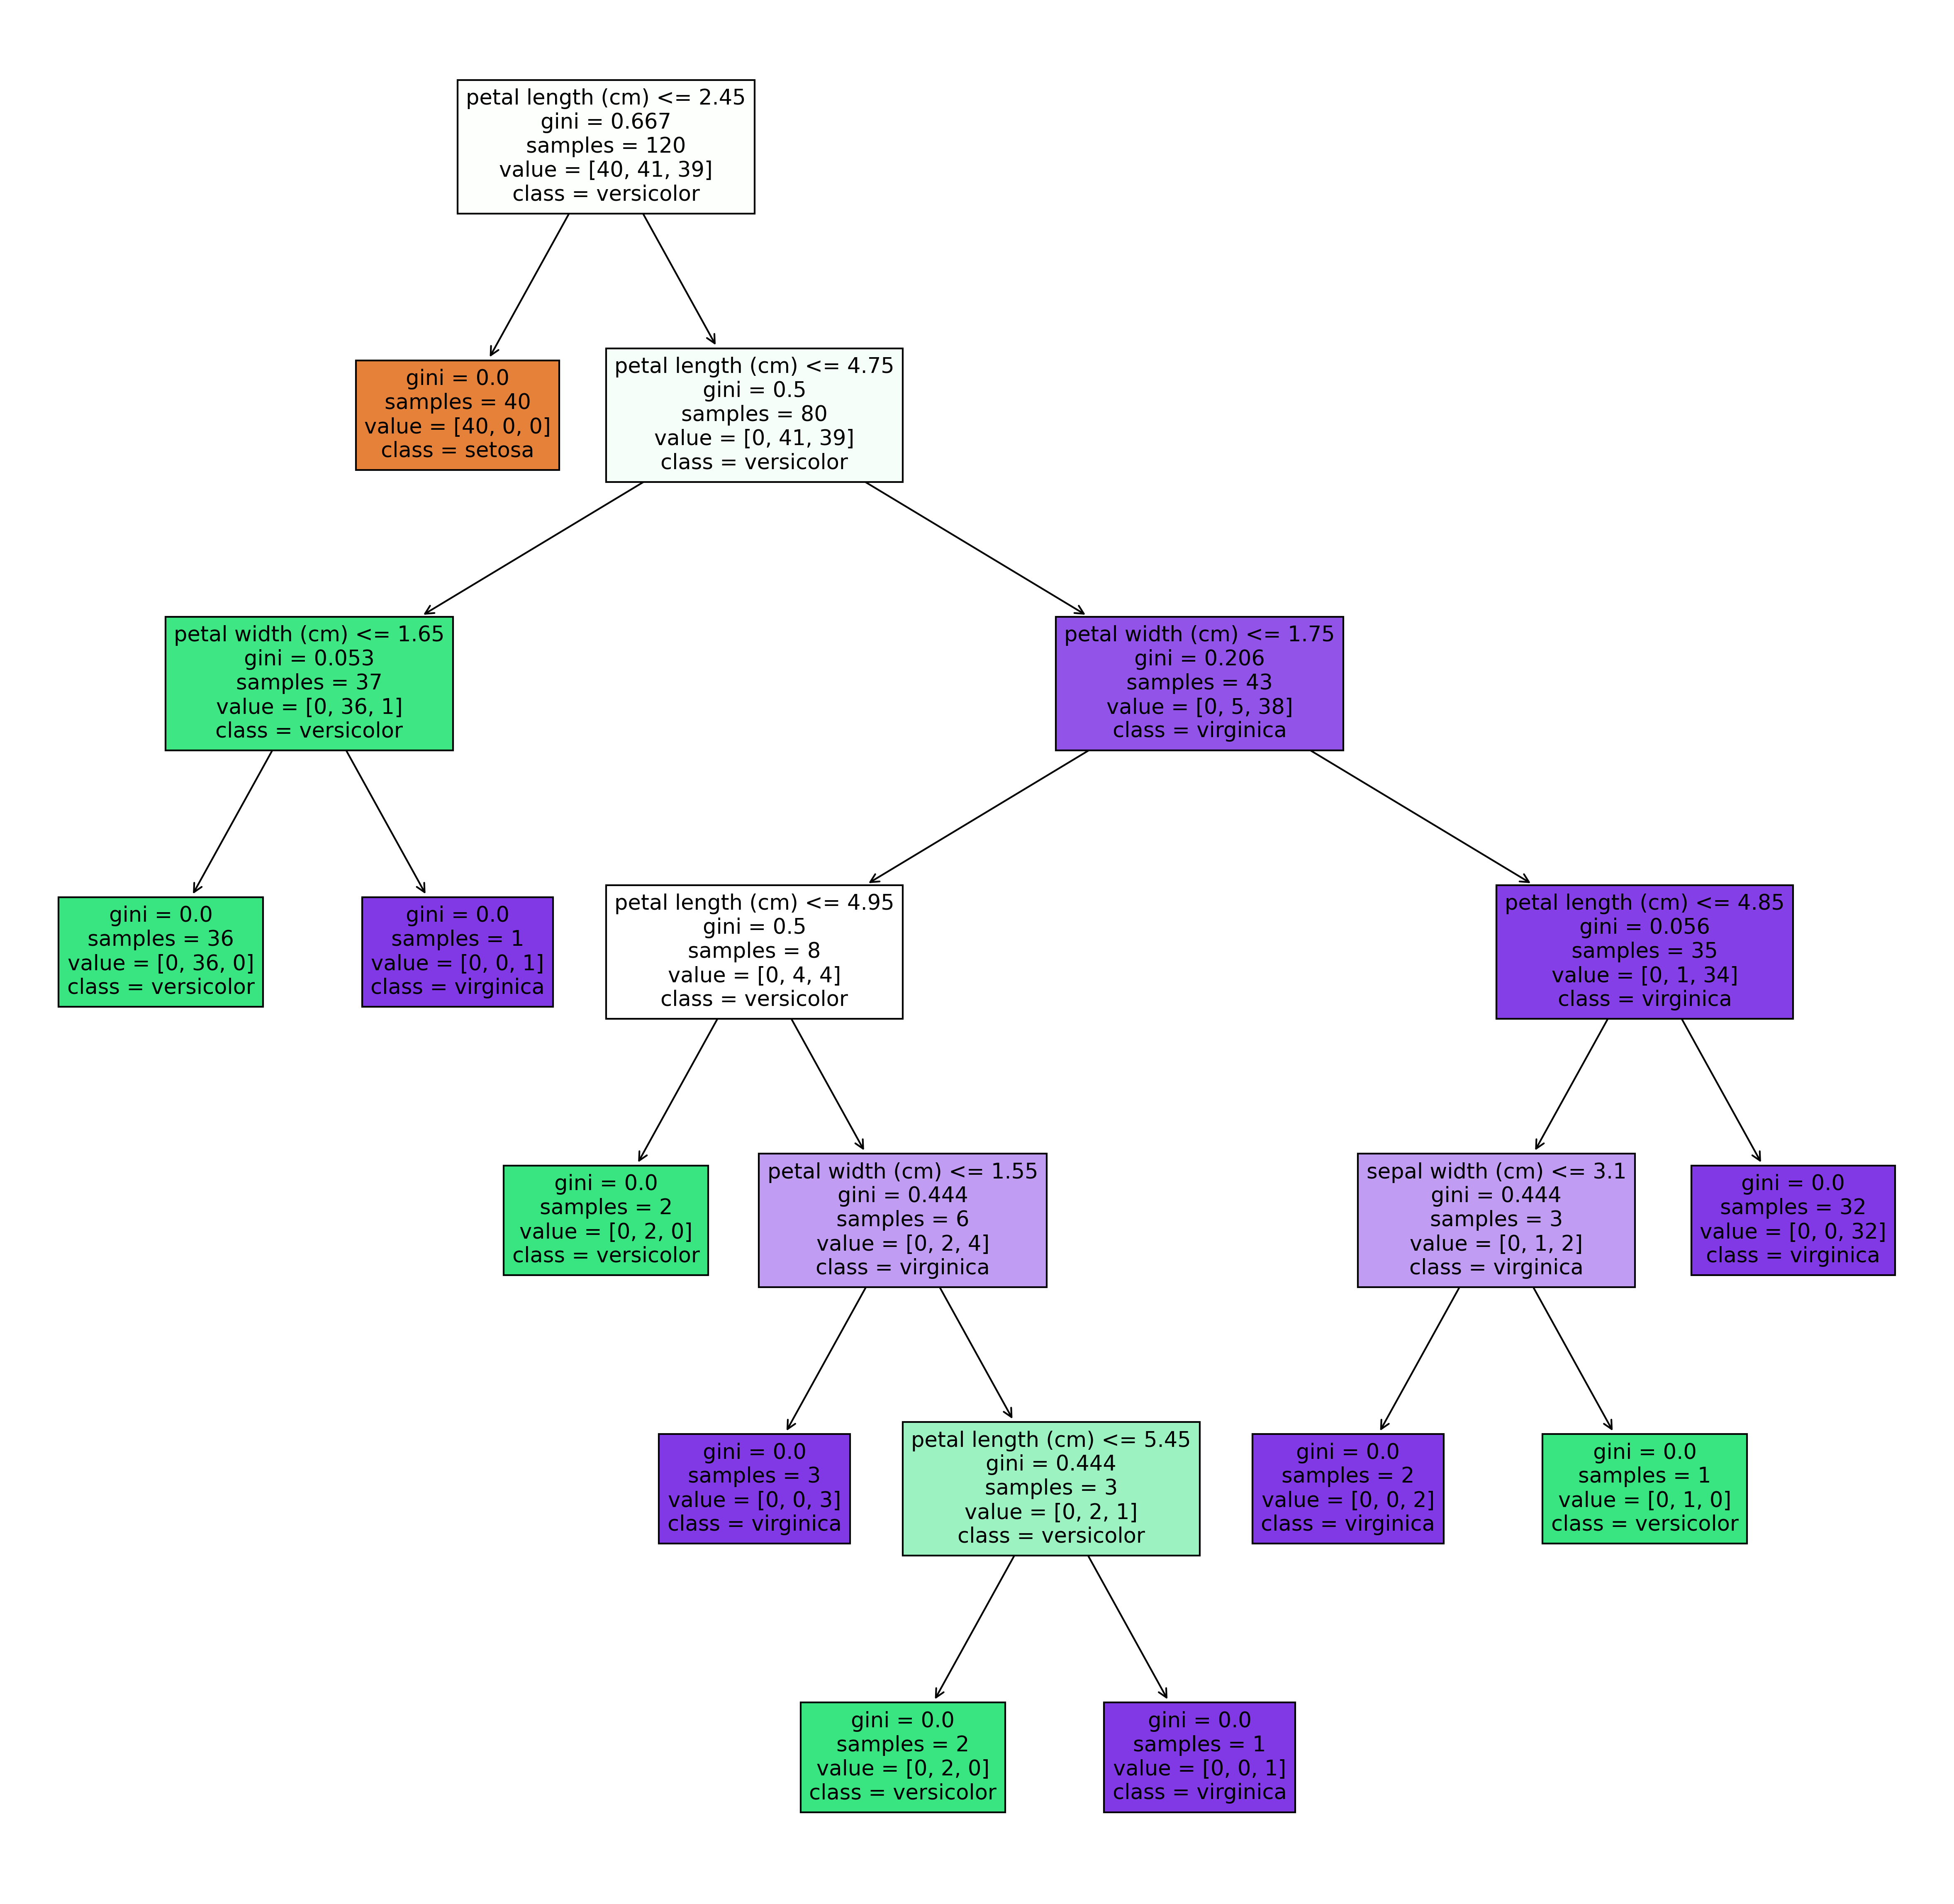

In [48]:
from sklearn import tree

characteristics = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
species = ['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi = 300)

tree.plot_tree(dtree, feature_names = characteristics, class_names = species, filled = True);

fig.savefig('Visualized_Decision_Tree.png')